In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [96]:
class GuideFilter():
    
    
    '''
    raw_img_path: the path of raw clean img (string)
    length: filter size (a integer)
    epslon: the hyperpara (float)
    delta: the degree of noise
    '''
    
    
    def __init__(self, raw_img_path, length, epslon, delta):
        self.img_path = raw_img_path
        self.size = length
        self.epslon = epslon
        self.raw_img = self.load_img()
        self.delta = delta
    
    
    def load_img(self):
        img2 = cv2.imread(self.img_path, -1)/255.
        img = np.array(img2, dtype=np.float32)
        return img
    
    
    def add_gnoise(self):
        noise = np.random.normal(0, self.delta, size=img.shape)
        out = noise + self.raw_img
        img_noise = np.array(np.clip(out, 0, 1))
        return img_noise
    
    
    def padding(self, img):
        m,n = img.shape
        r = self.size // 2
        padding = np.zeros(shape=(m+2*r,n+2*r), dtype=np.float32)
        padding[r:m+r,r:n+r] = img
        return padding
    
    
    def guidefilter(self):
        # add noise and apdding
        img_noise = self.add_gnoise()
        img_noise_pad = self.padding(img_noise)
        
        # calculate Ak, Bk
        r = self.size//2
        Ak = np.zeros(self.raw_img.shape, dtype=np.float32)
        Bk = np.zeros(self.raw_img.shape, dtype=np.float32)
        row,col = img_noise_pad.shape
        
        for i in range(r,row-r):
            for j in range(r,col-r):
                box = img_noise_pad[i-r:i+r+1, j-r:j+r+1]
                delta2 = np.std(box)**2
                Ak[i-r, j-r] = delta2/(delta2+epslon)
                Bk[i-r, j-r] = (1-Ak[i-r, j-r])*np.mean(box)
        
        # mean Ak, Bk
        pad_a = self.padding(Ak)
        pad_b = self.padding(Bk)
        
        Ak_hat = np.zeros(shape=Ak.shape, dtype=np.float32)
        Bk_hat = np.zeros(shape=Bk.shape, dtype=np.float32)

        for i in range(r,row-r):
            for j in range(r,row-r):
        
                Ak_hat[i-r, j-r] = np.mean(pad_a[i-r:i+r+1, j-r:j+r+1])
                Bk_hat[i-r, j-r] = np.mean(pad_b[i-r:i+r+1, j-r:j+r+1])
        
        # outputs
        img_denoise = Ak_hat*img_noise + Bk_hat
        #self.plotfig(img_denoise)
        return img_denoise
    
    
    def plotfig(self, img):
        plt.axis('off')
        plt.imshow(img, cmap='gray')
        plt.show()
        
    
    def compare_fig(self):
        #plt.subplot(311)
        plt.axis('off')
        plt.title('denoise_img')
        plt.imshow(self.guidefilter(), cmap='gray')
        plt.show()

        #plt.subplot(312)
        plt.axis('off')
        plt.title('noise_img')
        plt.imshow(self.add_gnoise(), cmap='gray')
        plt.show()

        #plt.subplot(313)
        plt.axis('off')
        plt.title('raw_img')
        plt.imshow(self.raw_img, cmap='gray')
        plt.show()

In [92]:
img_path = './Set12/08.png'
guideFilter = GuideFilter(img_path, 5, 0.1, 0.1)
denoise_img = guideFilter.guidefilter()

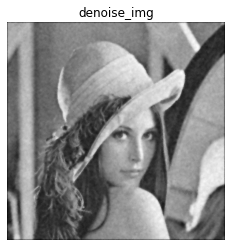

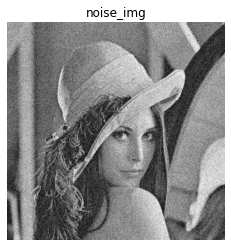

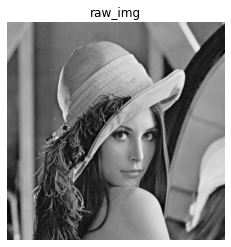

In [97]:
img_path = './Set12/08.png'
guideFilter = GuideFilter(img_path, 5, 0.1, 0.1)
guideFilter.compare_fig()